## defintitions and imports


In [74]:
# imports
from numbers import Number
from typing import Sequence, Callable, Union
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
from matplotlib import cm
import numdifftools as nd


In [75]:
# function definitions
def f(x : Sequence) -> Sequence:
    return np.array([10 * pow(x[0], 4) + 3 * pow(x[0], 3) -30 * x[0] * x[0] + 10*x[0]])


def g(x :  Sequence) -> Sequence:
    return np.array([10 * pow(x[1], 4) + 10 * pow(x[0], 4) + 3 * pow(x[0], 3) - 30 * x[0] * x[0] + 10 * x[0]])


def f_gradient(x : Sequence) -> Sequence:
    return np.array([40 * pow(x[0], 3) + 9 * pow(x[0], 2) -60 * x[0]  + 10])


def g_gradient(x :  Sequence) -> Sequence:
    return np.array([40 * pow(x[0], 3) + 9 * pow(x[0], 2) - 60 * x[0] + 10, 40 * pow(x[1], 3)])


## plotting


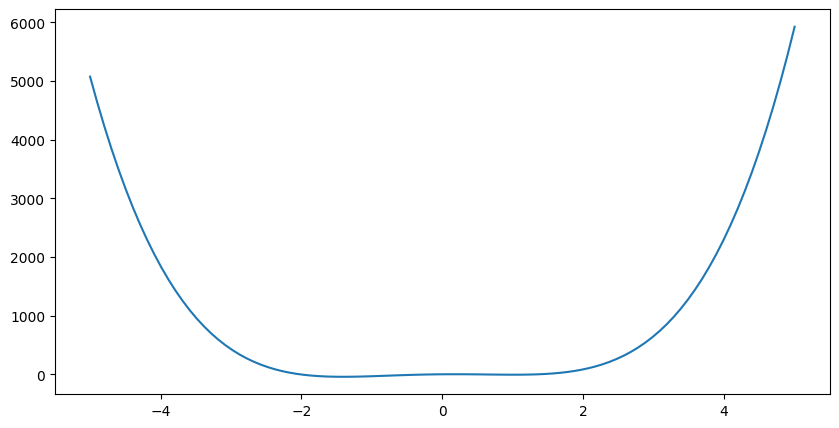

In [76]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, [f([x]) for x in x])

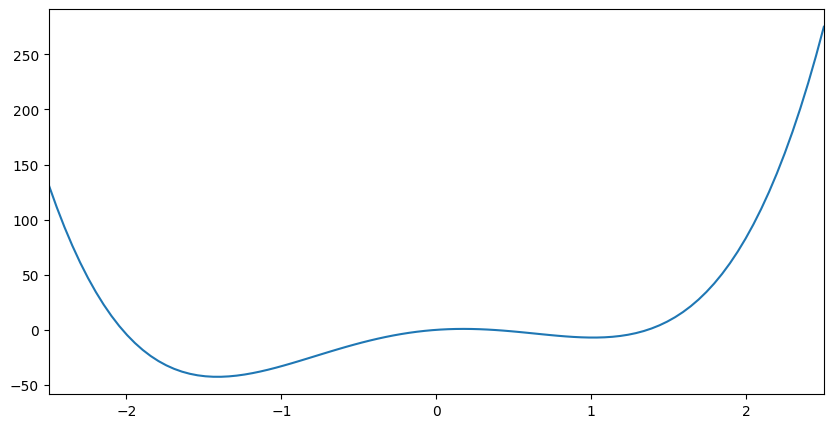

In [77]:
# f(x) plot
x = np.linspace(-2.5, 2.5, 100)
fig = plt.figure(figsize = (10, 5))
plt.xlim([-2.5, 2.5])
plt.plot(x, [f([x]) for x in x])

/tmp/ipykernel_13493/1719409923.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


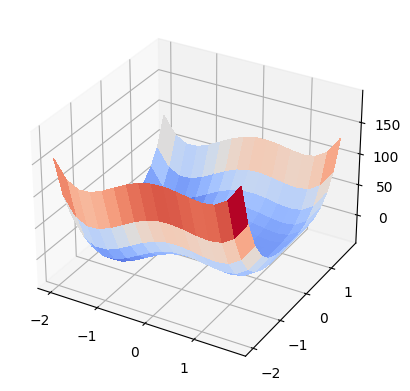

In [78]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-2, 2, 0.25)
Y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

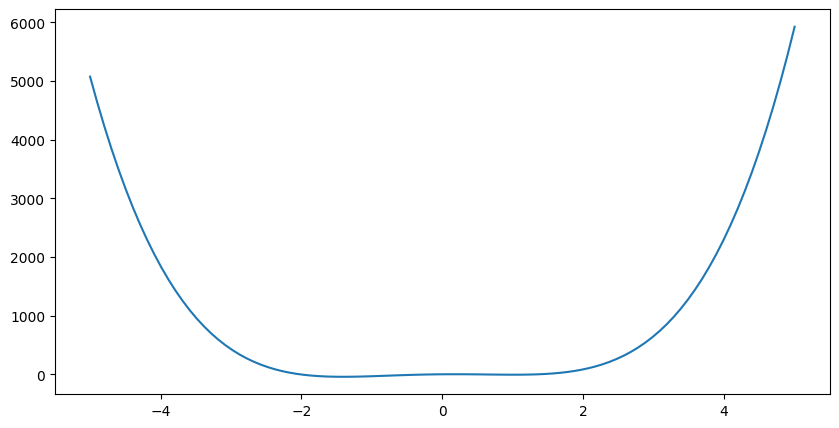

In [79]:
# f(x) plot
x = np.linspace(-5, 5, 100)
fig = plt.figure(figsize = (10, 5))
plt.plot(x, [f([x]) for x in x])

/tmp/ipykernel_13493/354339168.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


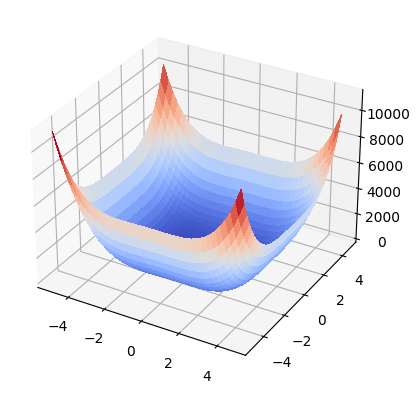

In [80]:
# g(x) plot

# external window
# %matplotlib qt
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = g([X, Y])[0]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

plt.show()

## optimalistation


In [81]:
f_global_min = [-1.41237]
f_local_min = [1.01255]
g_global_min = [-0.71458, 0]
g_local_min = [1.15151, 0.5227]

In [82]:
def stop_test(gradient_at_point: Sequence, eps: Number) -> bool:
    return np.linalg.norm(gradient_at_point) <= eps


def gradient_descend(
    gradient: Callable, starting_point: Sequence, step: Number, eps=0.01, max_iter=50
) -> Union[Sequence, int]:
    point = starting_point
    iteration_counter = 0
    found_minimum = False
    while not found_minimum:
        gradient_at_point = gradient(point)
        point -= gradient_at_point * step
        found_minimum = stop_test(gradient_at_point, eps)
        iteration_counter += 1
    return point, iteration_counter


In [83]:
x = gradient_descend(f_gradient, [-5], 10**(-3))

print(x)

(array([-1.41232284]), 70)
